# Evaluation Project 6: Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent variables - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History, and Property_Area.
Dependent Variable (Target Variable):- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore 

import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, power_transform 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

# Understanding the dataset: 

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1. We  have 614 rows and 13 columns in total, 12 variables are fearure variables and 1 is target variable. Loan status is target variable. 
2. Data types that we had is object, integer, and float. 

In [6]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Checking the null values - 

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We do have null values in gender, dependents, self-employed, loan amount, loan_amount_term, and credit history. It can't be ignored since each variable here plays a significant role in determing the loan status.

Filling the null values with the relevant fillna method here. 

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df['Gender'] =df['Gender'].fillna(df['Gender'].mode())

In [10]:
df['Married'] = df['Married'].fillna(df['Married'].mode())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode())
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

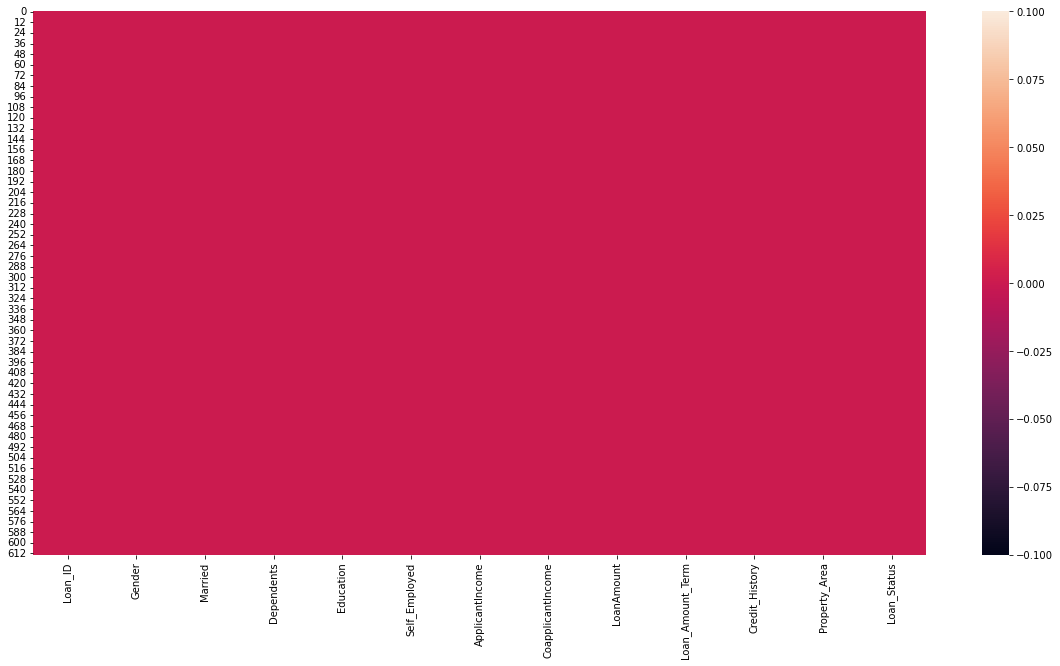

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


Observations: 

    1. The standard deviation of certain variables are quite high implying that ceratin outliers exsist in the distribution. 
    2. Mean is more the 50% median value implying data is rightly skewed and not normally distributed. 
    3. Some level of skewness is also there in the dataset. 

# Exploratry Data Analysis - 

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

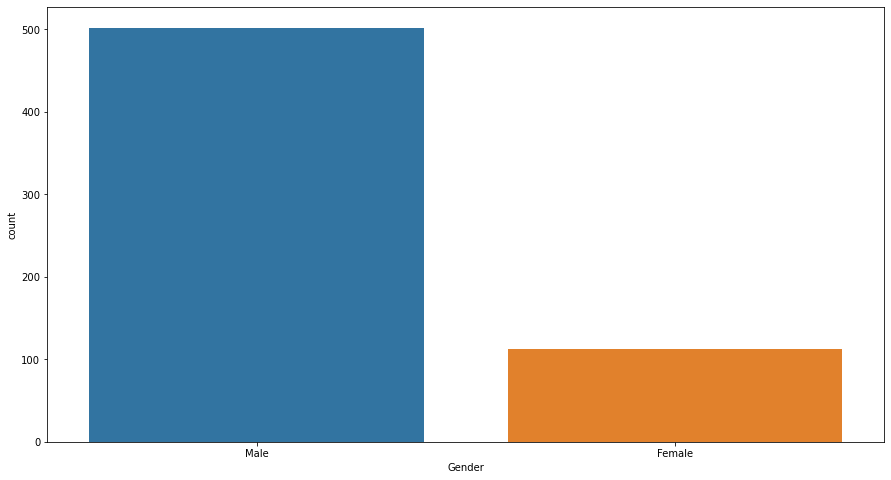

In [16]:
print(df['Gender'].value_counts())
plt.figure(figsize = [15,8])
sns.countplot(df['Gender'])

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

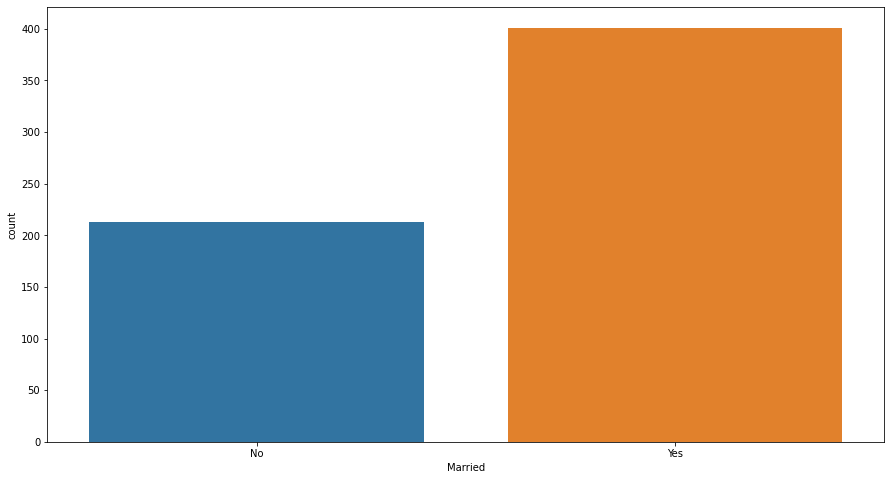

In [17]:
print(df['Married'].value_counts())
plt.figure(figsize = [15,8])
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

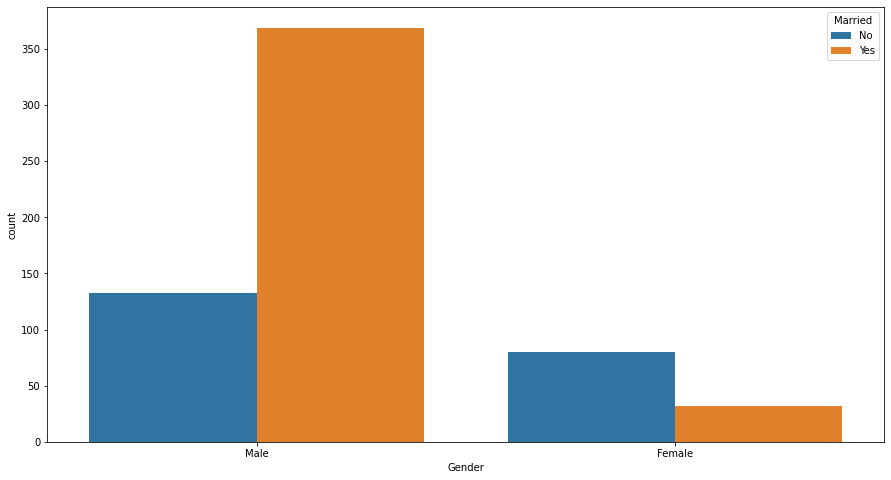

In [18]:
plt.figure(figsize = [15,8])
sns.countplot(df['Gender'], hue=df['Married'])

Observations: 
    
    1. Generally male asked for the loan majority of the times comparitevly to the females. The distinction between the two is massive.
    2. As it turns into married, still males asked more for the loan amount but the aggregate number in male falls but married females asked more comparitevly to the single females for the loan sanction.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

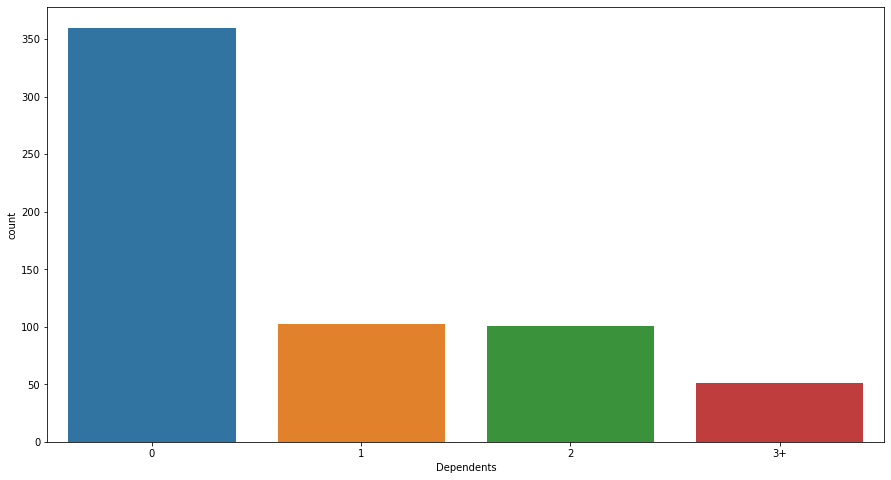

In [19]:
print(df['Dependents'].value_counts())
plt.figure(figsize = [15,8])
sns.countplot(df['Dependents'])

The individual who asked for the loan amount majorly has o dependents on them. 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

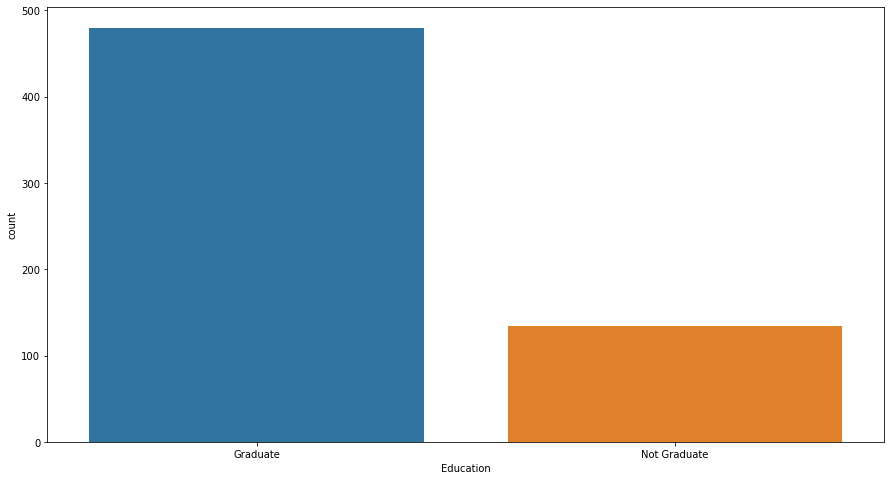

In [20]:
print(df['Education'].value_counts())
plt.figure(figsize=[15,8])
sns.countplot(df['Education'])

Generally majorly gradauate population asked for the loan sanction as compared to the non-graduates.

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

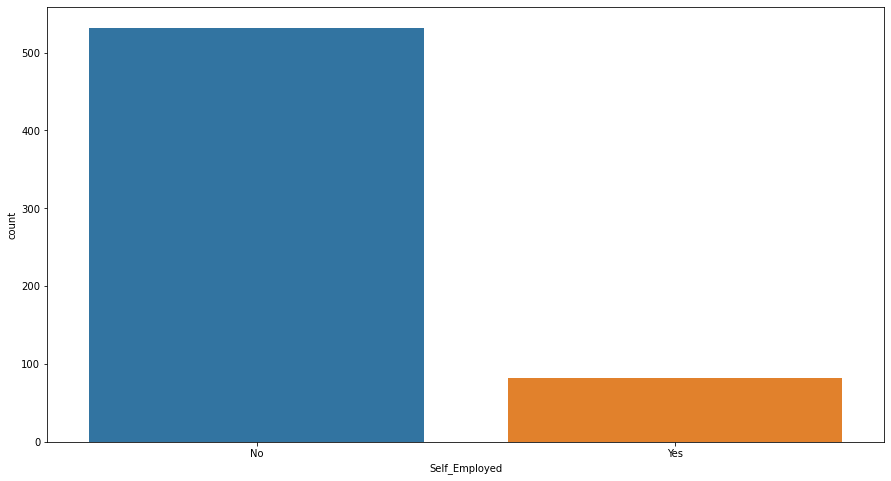

In [21]:
print(df['Self_Employed'].value_counts(normalize=True))
plt.figure(figsize=[15,8])
sns.countplot(df['Self_Employed'])

People who are workking for somebody else either in private or government sectors (who has a regular job) asked for the loan amount comparitevly more to the population who is self employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

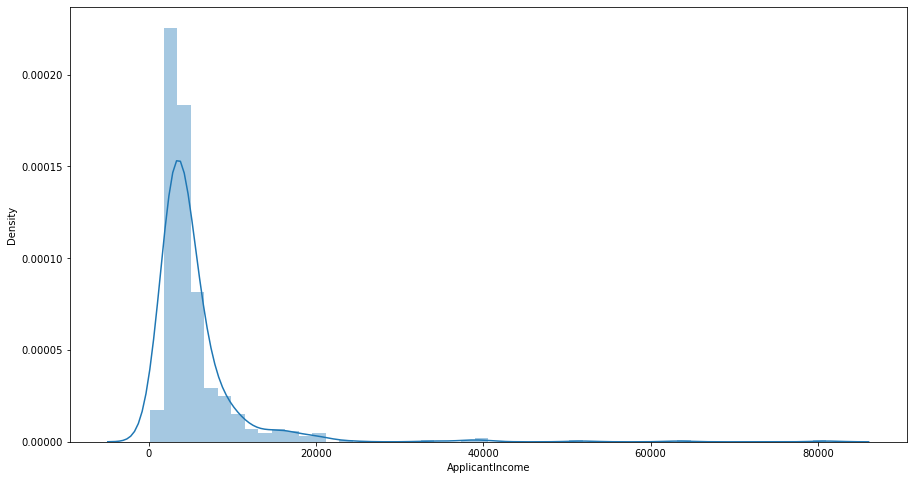

In [22]:
plt.figure(figsize = [15,8])
sns.distplot(df['ApplicantIncome'])

Majority of the population's income lies in range from 0 to 20000 monthly. 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

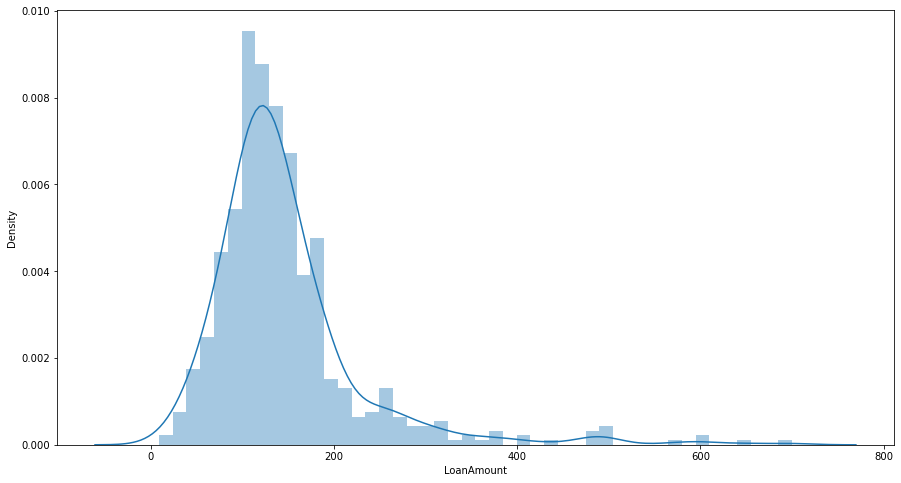

In [23]:
plt.figure(figsize=[15,8])
sns.distplot(df['LoanAmount'])

Distribution for the loan amount applied is quite normal; although massive popluation asked for the loan within the range of 10 to 400.

1.000000    0.773616
0.000000    0.144951
0.842199    0.081433
Name: Credit_History, dtype: float64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

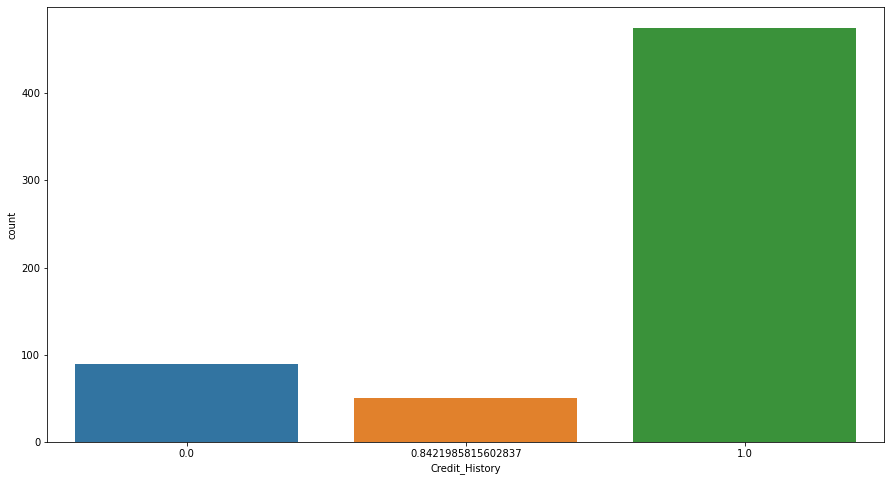

In [24]:
print(df['Credit_History'].value_counts(normalize=True,dropna=False))
plt.figure(figsize = [15,8])
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

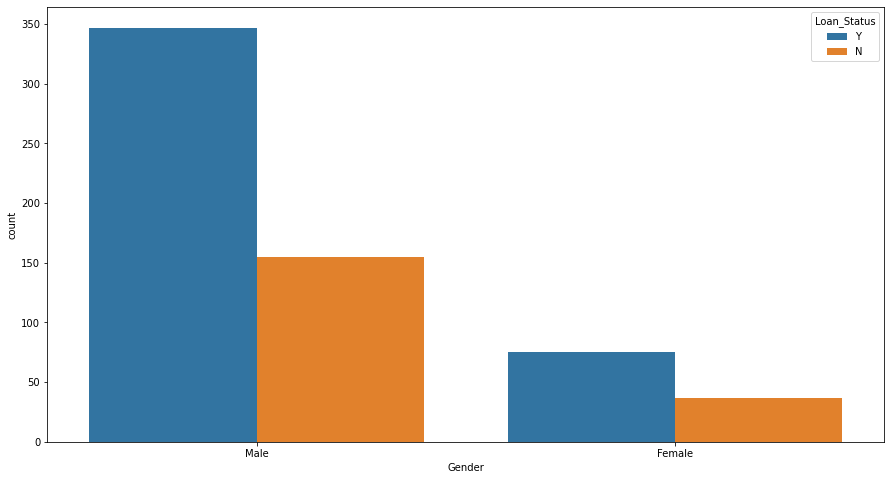

In [26]:
plt.figure(figsize=[15,8])
sns.countplot(df['Gender'],hue=df['Loan_Status'], data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

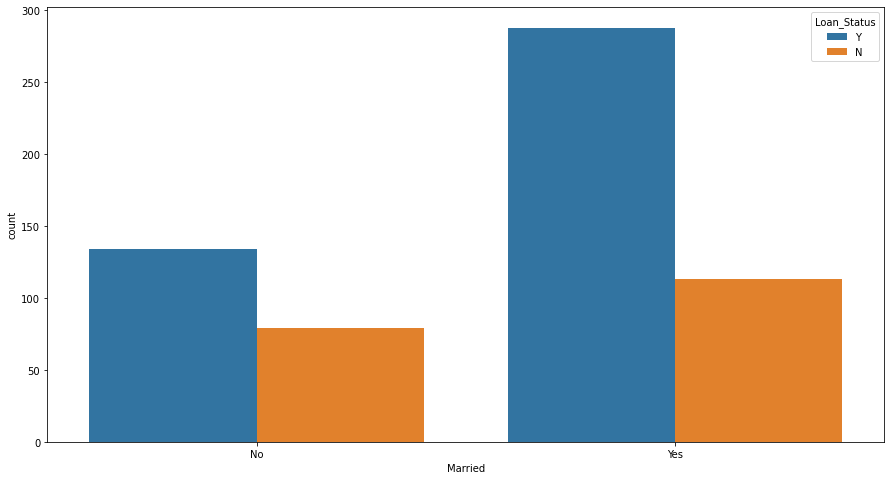

In [27]:
plt.figure(figsize=[15,8])
sns.countplot(df['Married'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

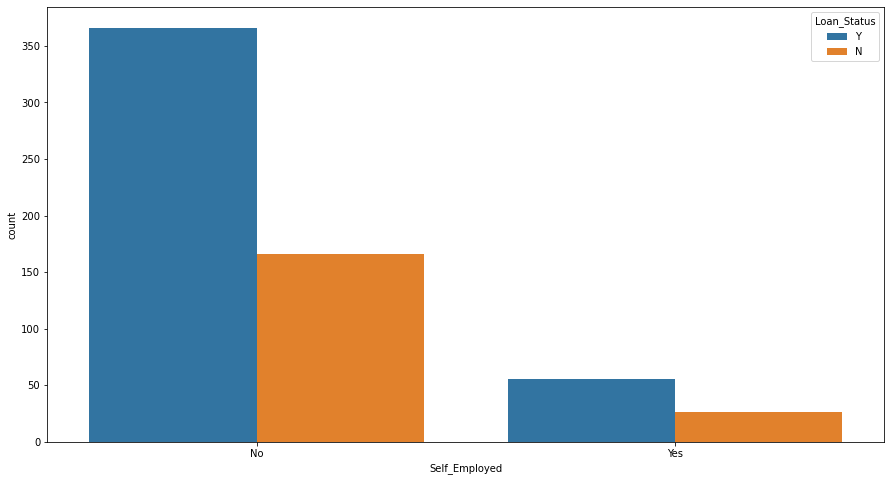

In [28]:
plt.figure(figsize=[15,8])
sns.countplot('Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

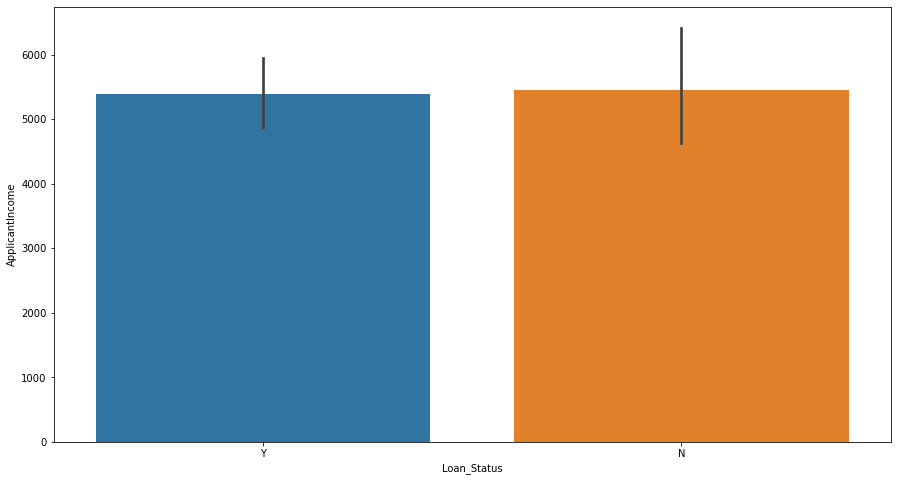

In [29]:
plt.figure(figsize=[15,8])
sns.barplot(x='Loan_Status',y='ApplicantIncome', data=df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Encoding the object type variable in integer data type - 

In [33]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [34]:
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [36]:
df.drop('Loan_ID', axis=1, inplace=True)

In [37]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Checking the outliers - 

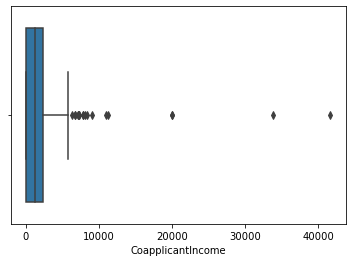

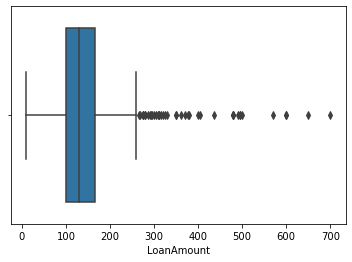

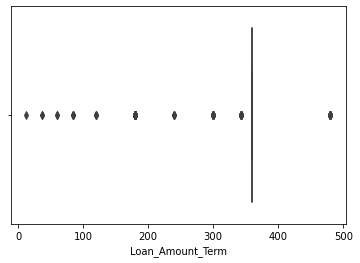

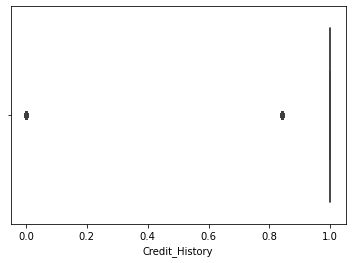

In [38]:
for i in df.columns:
    if df[i].dtypes==np.number:
        sns.boxplot(df[i])
        plt.show()

In [39]:
z = np.abs(zscore(df))
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [40]:
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(577, 12)


In [41]:
df.shape

(614, 12)

In [42]:
df = df_new

<AxesSubplot:ylabel='Density'>

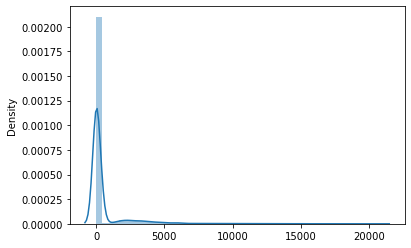

In [43]:
sns.distplot(df)

# Checking the skewness - 

In [44]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform
df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = power_transform(df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']], method = 'yeo-johnson')

In [47]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<AxesSubplot:ylabel='Density'>

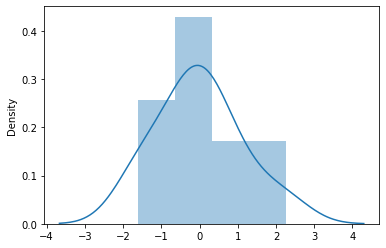

In [48]:
sns.distplot(df.skew())

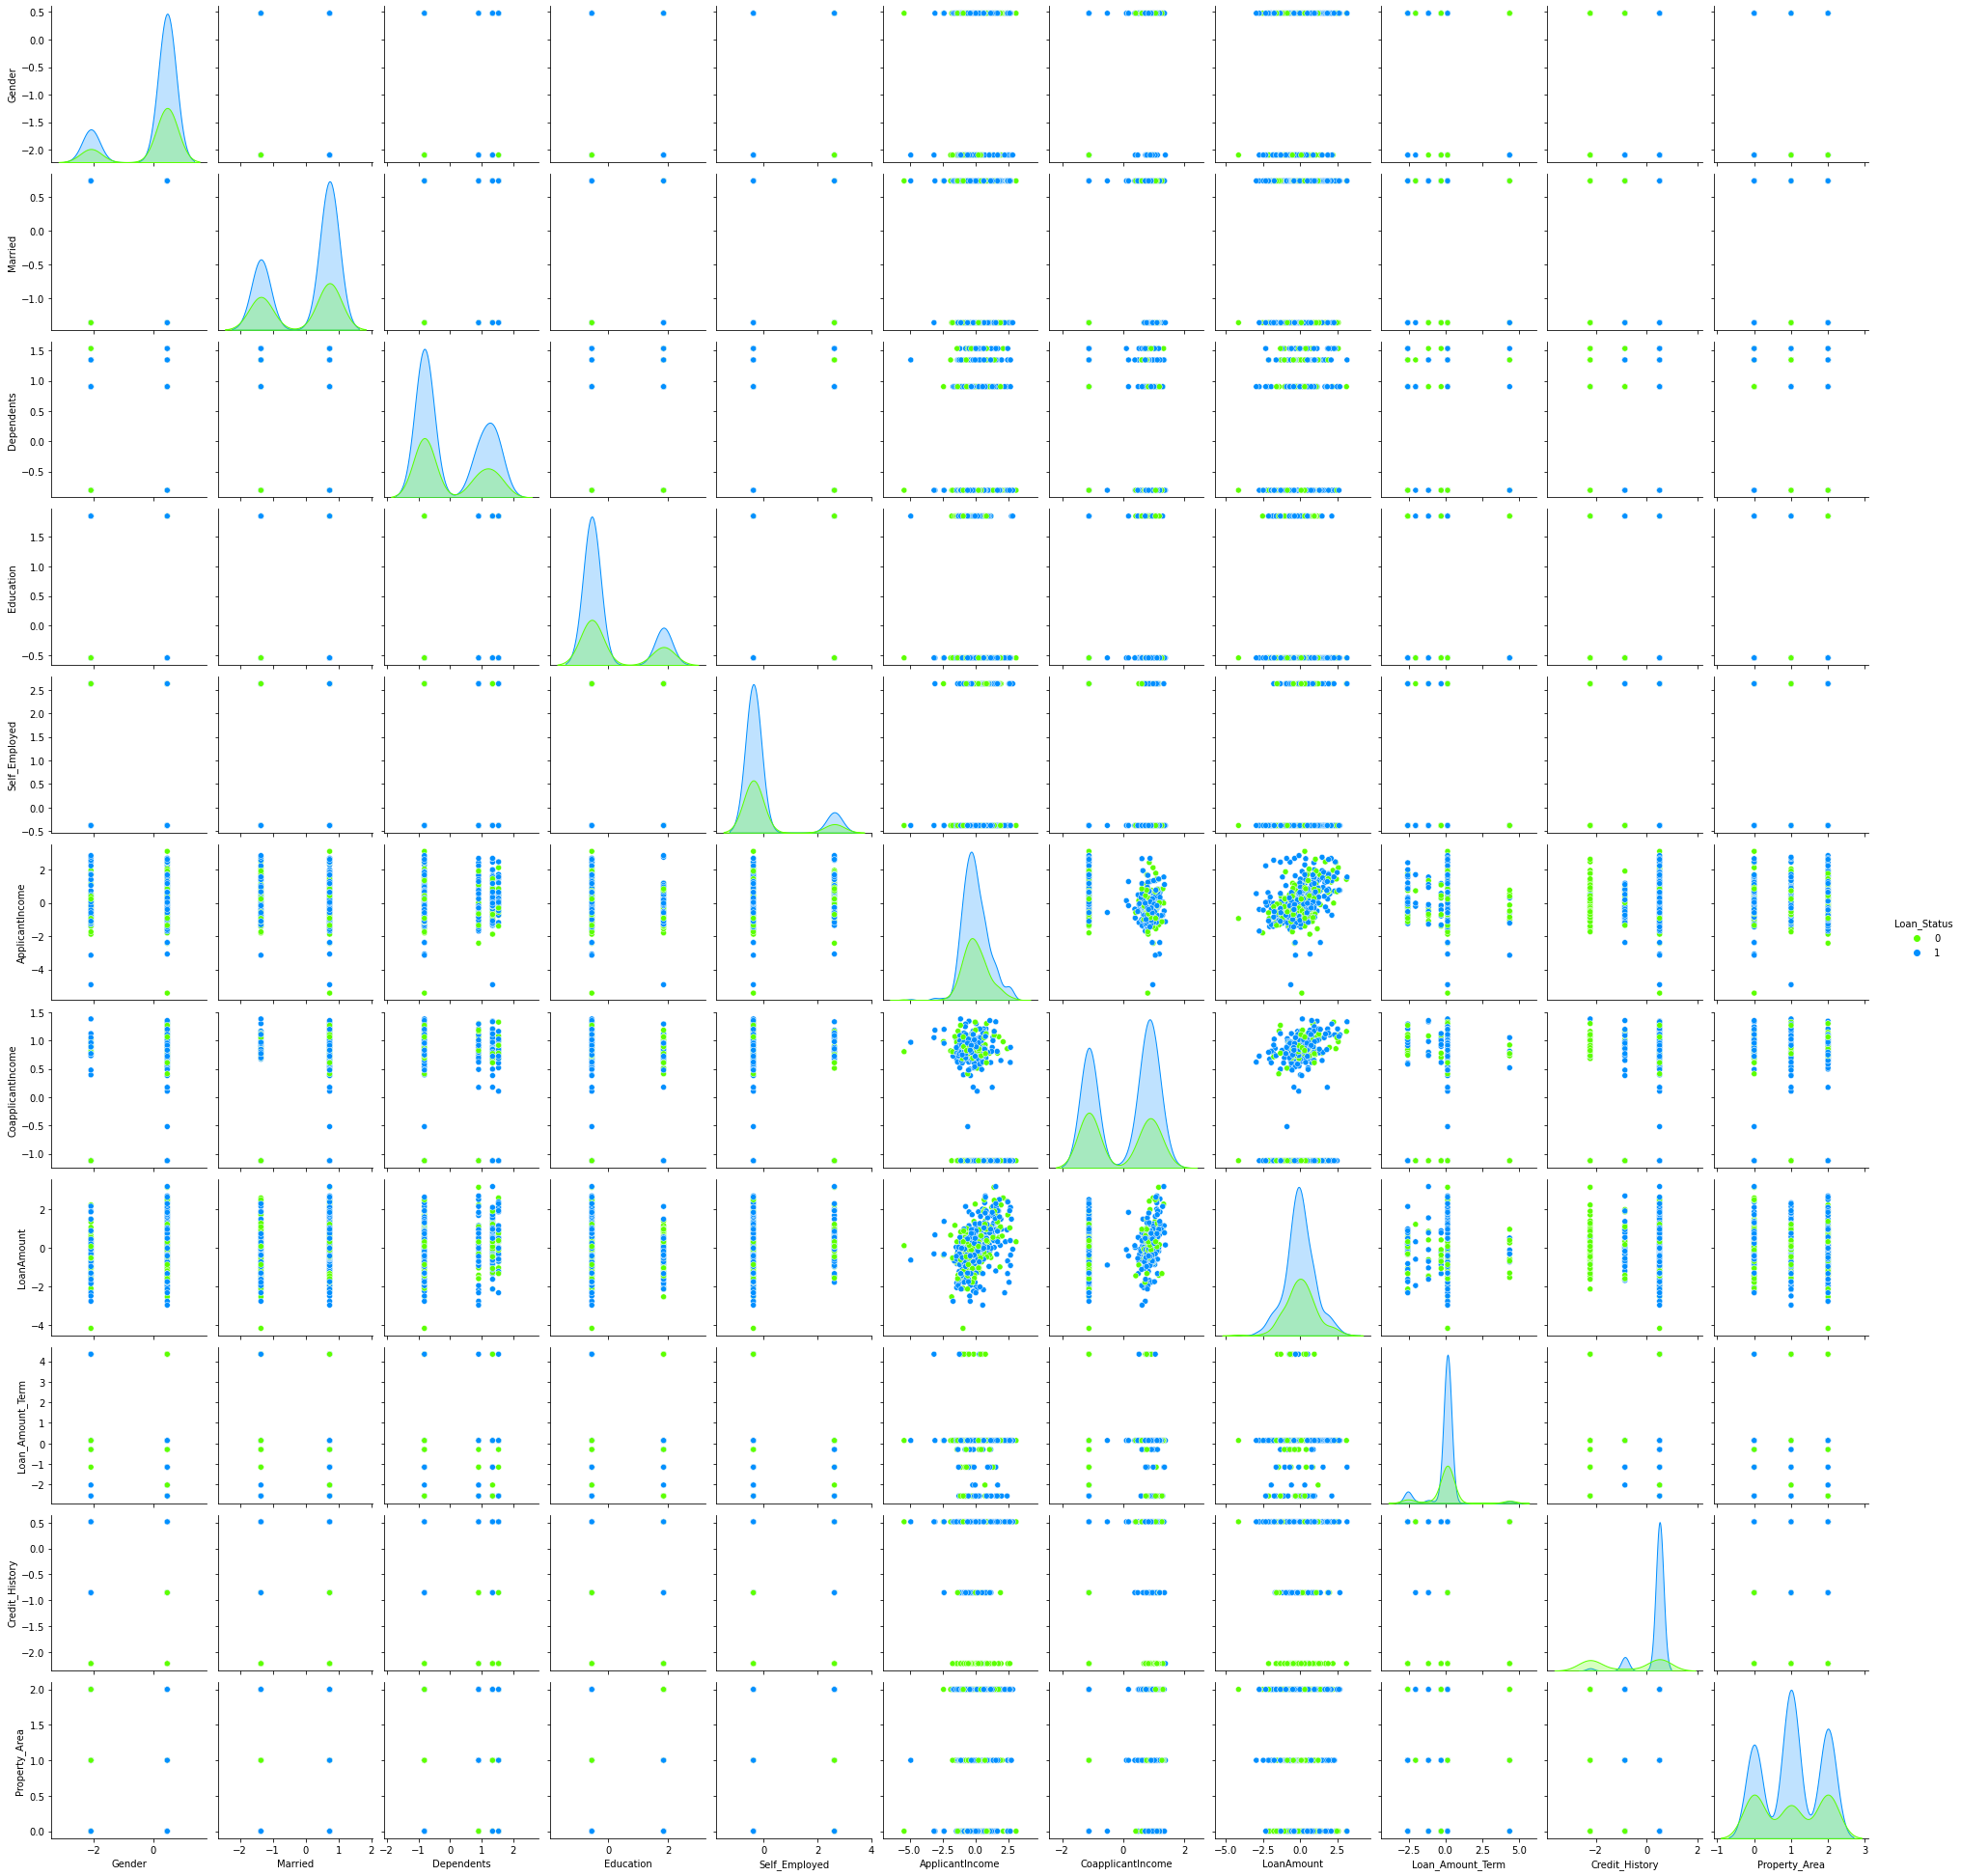

In [49]:
sns.pairplot(df,hue="Loan_Status",palette="gist_rainbow")

# Checking the correlation - 

In [50]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.183471,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.097638,0.022963,-0.026340,0.017408
Married,0.378997,1.000000,0.349618,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.128208,0.000163,0.010595,0.089026
Dependents,0.183471,0.349618,1.000000,0.059728,0.069648,0.108178,0.023606,0.135394,-0.089724,-0.014554,0.040716,0.018517
Education,0.045696,0.024817,0.059728,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.067928,-0.089174,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.069648,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.052342,-0.011045,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.108178,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.088056,0.045597,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.023606,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.002204,-0.008985,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.135394,-0.126509,0.117550,0.434072,0.196334,1.000000,0.022149,-0.011859,-0.094220,-0.028999
Loan_Amount_Term,-0.097638,-0.128208,-0.089724,-0.067928,-0.052342,-0.088056,-0.002204,0.022149,1.000000,0.007488,-0.032706,-0.053447
Credit_History,0.022963,0.000163,-0.014554,-0.089174,-0.011045,0.045597,-0.008985,-0.011859,0.007488,1.000000,-0.012726,0.537357


<AxesSubplot:>

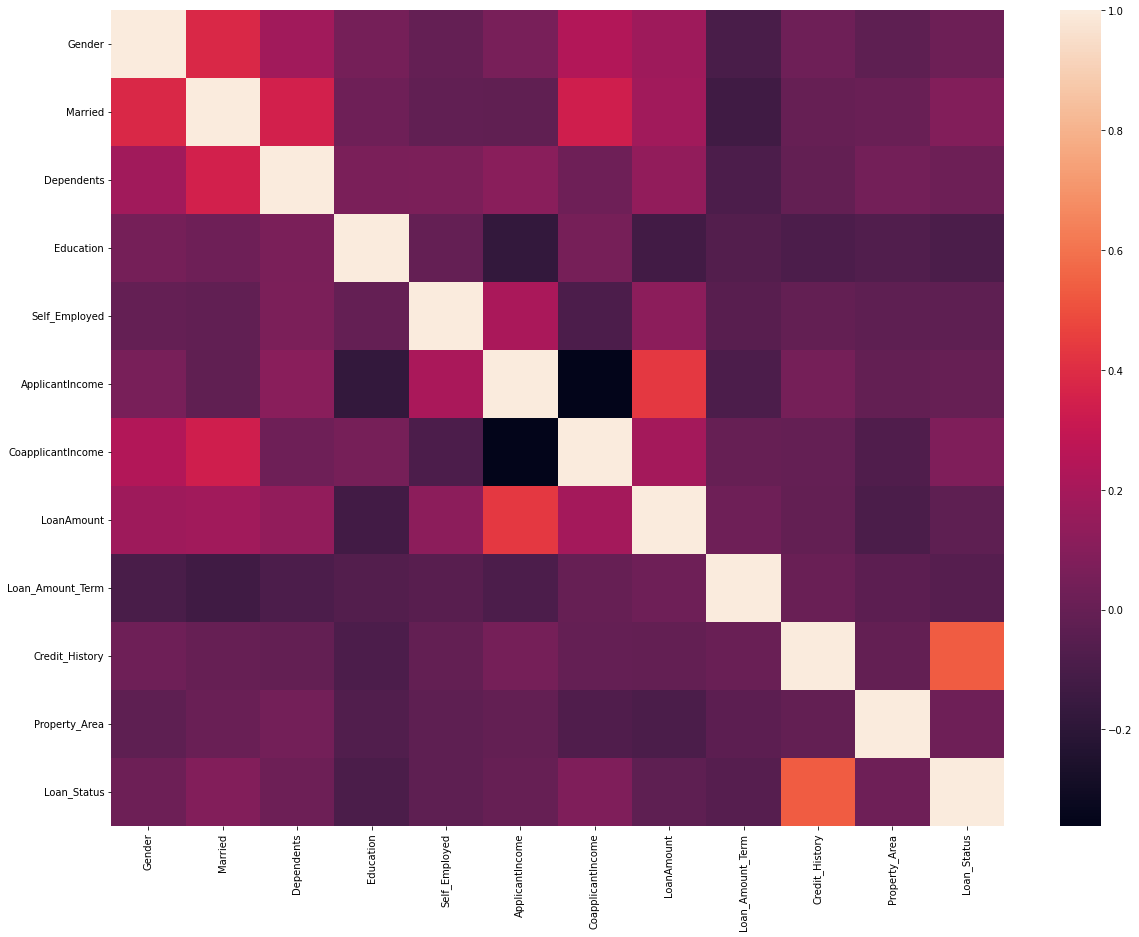

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

Observation - 

    1. Each variable hold quite little significant correlation with the tarrget variable. 
    2. Even in between the feature variables, there is very less correlation.

# Splitting the x and y variable here - 

In [52]:
X= df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']

In [53]:
X.shape , Y.shape

((577, 11), (577,))

In [54]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Since the y variable is quite imbalanced. We will balance it. 

In [55]:
sm = SMOTE()
X,Y = sm.fit_resample(X,Y) 

In [56]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Selecting the model now - 

In [57]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=122,test_size=.20)

In [59]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [60]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 73.125
Confusion Matrix of  LogisticRegression()  is 
 [[52 34]
 [ 9 65]]
              precision    recall  f1-score   support

           0       0.85      0.60      0.71        86
           1       0.66      0.88      0.75        74

    accuracy                           0.73       160
   macro avg       0.75      0.74      0.73       160
weighted avg       0.76      0.73      0.73       160

**************************************************
Accuracy_Score of  RidgeClassifier() is 73.125
Confusion Matrix of  RidgeClassifier()  is 
 [[51 35]
 [ 8 66]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        86
           1       0.65      0.89      0.75        74

    accuracy                           0.73       160
   macro avg       0.76      0.74      0.73       160
weighted avg       0.77      0.73      0.73       160

**************************************************
Accuracy_Score o

# Performing the cross-validation now - 

In [61]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 73.125
cross Validation accuracy score of  LogisticRegression()  is  71.73427672955974
**************************************************
Accuracy_Score of  RidgeClassifier() is 73.125
cross Validation accuracy score of  RidgeClassifier()  is  70.85455974842768
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 75.0
cross Validation accuracy score of  DecisionTreeClassifier()  is  76.25235849056604
**************************************************
Accuracy_Score of  SVC() is 74.375
cross Validation accuracy score of  SVC()  is  73.86949685534591
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 78.75
cross Validation accuracy score of  KNeighborsClassifier()  is  74.74842767295597
**************************************************
Accuracy_Score of  RandomForestClassifier() is 85.0
cross Validation accuracy score of  RandomForestClassifier()  is  83.0

# Performing the hyper-tuning now - 

In [72]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
rf_random = RandomizedSearchCV(estimator = RFR_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [75]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [76]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [77]:
pred=rf_random.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.85

In [78]:
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))

Accuracy score: 85.0


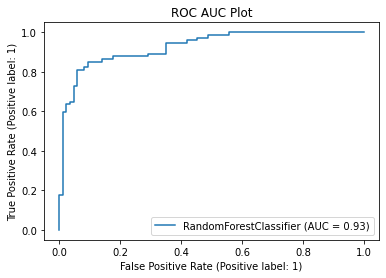

In [80]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
plot_roc_curve(rf_random.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

Here we are getting the AUC score of 93% which is quite better. Saving the model now! 

# Saving best model - 

In [81]:
import joblib
joblib.dump(rf_random.best_estimator_,"LoanStatus.pkl")

['LoanStatus.pkl']